##### https://docs.scipy.org/doc/scipy/reference/signal.html

In [427]:
import pandas as pd
import numpy as np 
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy import signal

In [428]:
def open_csv(filePath1,exerciseNames):
    df = pd.read_csv(filePath1)
    df.head()
    return df,exerciseNames

In [437]:
# Upsamples the values to 1280.
def resamples(x, y,z,x1,y1,z1): #,t1,i1,r1
    gry_z = signal.resample(z, 1280)#HandFlip["Gyr(z) "]
    #debug..
    #print(gry_z.shape)
    gry_y = signal.resample(y, 1280) #HandFlip["Gyr(y)"]
    #debug..
    #print(gry_y.shape)
    gry_x = signal.resample(x, 1280) # HandFlip["Gyr(x)"]
    
    acc_z = signal.resample(z1, 1280) #HandFlip["Gyr(z) "]
    #debug..
    #print(gry_z.shape)
    acc_y = signal.resample(y1, 1280) #HandFlip["Gyr(y)"]
    #debug..
    #print(gry_y.shape)
    acc_x = signal.resample(x1, 1280) # HandFlip["Gyr(x)"]
    #debug..
    #print(gry_x.shape)
    
#     thumb = signal.resample(t1, 1280)
#     print(thumb.shape)
#     index = signal.resample(i1, 1280)
#     print(index.shape)
#     ring =  signal.resample(r1, 1280)
#     print(ring.shape)

    return gry_x,gry_y,gry_z,acc_x,acc_y,acc_z#,thumb,index,ring

In [438]:
#plots gyroscope values of  x,y,z coordinates.
def plot_gyro(df,exerciseNames,mode,save_file_path,gry_x,gry_y,gry_z):
    lists = []
    k =0
    for i in range(gry_x.shape[0]):
        lists.append(i)
    #Debug
    # print(lists)
    plt.plot(lists, stats.zscore(gry_x,ddof = df.shape[0]-1),color='blue',linestyle = "-",linewidth=0.5)
    plt.xlabel('Number of samples',color ="red")
    plt.ylabel('Gyr in x direction',color ="red")
    #plt.xlim(0, 56)
    #plt.figure(dpi=528, figsize=(40,40))
    plt.title(mode + " "+exerciseNames + " exercise Gyr X",fontsize=15, fontweight=4, color='black', y=1.02)
    plt.savefig(save_file_path + "/" + "Gyr_x_" + mode + "_" + exerciseNames)
    plt.show()
   
    plt.plot(lists, stats.zscore(gry_y,ddof = df.shape[0]-1),color='blue',linestyle = "-",linewidth=0.5)
    plt.xlabel('Number of samples',color ="red")
    plt.ylabel('Gyr in y direction',color ="red")
    #plt.xlim(0, 56)
    #plt.figure(dpi=528, figsize=(40,40))
    plt.title(mode + " " + exerciseNames + " exercise Gyr y",fontsize=15, fontweight=4, color='black', y=1.02)
    plt.savefig(save_file_path + "/" + "Gyr_y_" + mode + "_" + exerciseNames)

    plt.show()
    
    plt.plot(lists, stats.zscore(gry_z,ddof = df.shape[0]-1),color='blue',linestyle = "-",linewidth=0.5)
    plt.xlabel('Number of samples',color ="red")
    plt.ylabel('Gyr in x direction',color ="red")
    #plt.xlim(0, 56)
    #plt.figure(dpi=528, figsize=(40,40))
    plt.title(mode + " " + exerciseNames + " exercise Gyr z",fontsize=15, fontweight=4, color='black', y=1.02)
    plt.savefig(save_file_path + "/" + "Gyr_z_" + mode + "_" + exerciseNames)
    plt.show()


In [439]:
def flex_graphs(df,thumb,index,ring,mode,exerciseNames,save_file_path):
    lists1 = []
    k =0
    for i in range(thumb.shape[0]):
        lists1.append(i)
    plt.plot(lists1, index,color='blue',linestyle = "-",linewidth=0.5)#,marker='o'
    plt.xlabel('Number of samples',color ="red")
    plt.ylabel('Index',color ="red")
    #plt.xlim(0, 566)
    #plt.figure(dpi=528, figsize=(40,40))
    plt.title(mode + " " + exerciseNames + " exercise - Full exercise 10 sec Index",fontsize=15, fontweight=4, color='black', y=1.02)
    plt.grid(True)
    plt.savefig(save_file_path + "/" + "Index_" + mode + "_" + exerciseNames)
    plt.show()
    
    plt.plot(lists1, thumb,color='blue',linestyle = "-",linewidth=0.5)#marker='o'
    plt.xlabel('Number of samples',color ="red")
    plt.ylabel('Thumb',color ="red")
    #plt.xlim(0, 566)
    plt.title(mode + " " + exerciseNames + "exercise - Full exercise 10 sec Thumb",fontsize=15, fontweight=4, color='black', y=1)
    plt.grid(True)
    plt.savefig(save_file_path + "/"  + "Thumb_" + mode + "_" + exerciseNames)
    plt.show()

In [440]:
def plot_acc(df,exerciseNames,mode,save_file_path,acc_x,acc_y,acc_z):
    lists1 = []
    k =0
    for i in range(acc_x.shape[0]):
        lists1.append(i)
    #print(lists)
    # Make the plot
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')
    plt.title(mode + " " + exerciseNames + " exercise Acceleration",fontsize=15, fontweight=4, color='black', y=1.02)
    ax.plot(acc_x, acc_y, acc_z, linewidth=0.5,color="blue")
    plt.savefig(save_file_path + "/" + "Acc_3d_" + mode + "_" + exerciseNames)    
    plt.show()
    plt.plot(lists1, acc_x,color='blue',linestyle = "-",linewidth=0.5)
    plt.xlabel('Number of samples',color ="red")
    plt.ylabel('Acceleration in x direction',color ="red")
    #plt.xlim(0, 56)
    #plt.figure(dpi=528, figsize=(40,40))
    plt.title(mode + " " + exerciseNames + " exercise Acceleration X",fontsize=15, fontweight=4, color='black', y=1.02)
    plt.savefig(save_file_path + "/" + "Acc_x_" + mode + "_" + exerciseNames)
    plt.show()
    plt.plot(lists1, acc_y,color='blue',linestyle = "-",linewidth=0.5)
    plt.xlabel('Number of samples',color ="red")
    plt.ylabel('Acceleration in y direction',color ="red")
    #plt.xlim(0, 56)
    #plt.figure(dpi=528, figsize=(40,40))
    plt.title(mode + " " + exerciseNames + " exercise Acceleration y",fontsize=15, fontweight=4, color='black', y=1.02)
    plt.savefig(save_file_path + "/" + "Acc_y_" + mode + "_" + exerciseNames)
    
    plt.show()
    
    plt.plot(lists1, acc_z,color='blue',linestyle = "-",linewidth=0.5)
    plt.xlabel('Number of samples',color ="red")
    plt.ylabel('Acceleration in z direction',color ="red")
    #plt.xlim(0, 56)
    #plt.figure(dpi=528, figsize=(40,40))
    plt.title(mode + " " + exerciseNames +" exercise Acceleration z",fontsize=15, fontweight=4, color='black', y=1.02)
    plt.savefig(save_file_path + "/" + "Acc_z_" + mode + "_" + exerciseNames)
    plt.show()

In [449]:
def fourier_transform(df,exerciseNames,mode):
    s = df['Thumb']
    sp = np.fft.fft(np.sin(df))
    freq = np.fft.fftfreq(df.shape[0])
    plt.title(mode + exerciseNames + " FFT")
    plt.xlabel("Frequencies",color="red")
    plt.ylabel(" Thumb",color="red")
    plt.grid(True)
    #plt.savefig("/Users/shehjarsadhu/Desktop/KAYA_DataTest/27-6-19_Victor/FullFingerTapThumb_1Cycle.png")
    plt.plot(abs(freq), abs(sp.real)) #freq, sp.imag
    plt.show()

In [450]:
def main():
    filePath1 = "/Users/shehjarsadhu/Desktop/KAYA_DataTest/1_7_19_adi/imu_only_bitshift/14_22_23_838_RIGHT_GLOVE_Hold_Hands_Out.csv"#/Users/shehjarsadhu/Desktop/KAYA_DataTest/1_7_19_adi/flex+imu_bitshift/14_19_12_052_RIGHT_GLOVE_Hand_Flip.csv" #"/Users/shehjarsadhu/Desktop/KAYA_DataTest/1_7_19_adi/imu_only_bitshift/14_23_17_857_RIGHT_GLOVE_Hand_Flip.csv"#"/Users/shehjarsadhu/Desktop/KAYA_DataTest/1_7_19_adi/imu_only/12_03_07_250_RIGHT_GLOVE_Hand_Flip.csv"
    save_file_path = "/Users/shehjarsadhu/Desktop/KAYA_DataTest/1_7_19_adi/imu_only_bitshift/plots/HoldingHandsOut" #"/Users/shehjarsadhu/Desktop/KAYA_DataTest/1_7_19_adi/flex+imu_bitshift/plots" 
    mode = "imu_only"
    exerciseName = "HoldingHandsOute"
    df,exerciseNames = open_csv(filePath1,exerciseName)
    #Debug
    #df.shape[0]
    gry_x,gry_y,gry_z,acc_x,acc_y,acc_z = resamples(df["Gyr(x)"],df["Gyr(y)"],df["Gyr(z) "],df["Acc(x)"],df["Acc(y)"],df["Acc(z)"])#''',df["Thumb"],df["Index"],df["Ring"]''' ,thumb,index,ring
    
    if mode=="Imu_Flex_only":
        flex_graphs(df,thumb,index,ring,mode,exerciseName,save_file_path)
        
    plot_gyro(df,exerciseNames,mode,save_file_path,gry_x,gry_y,gry_z)
    
    plot_acc(df,exerciseNames,mode,save_file_path,acc_x,acc_y,acc_z)
    


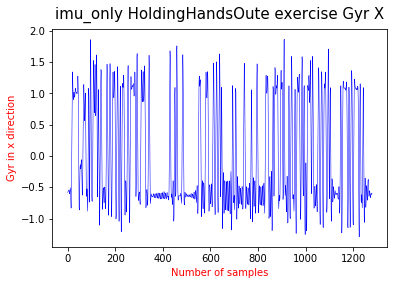

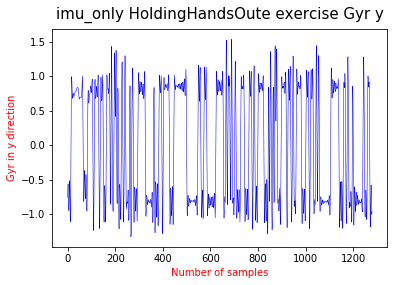

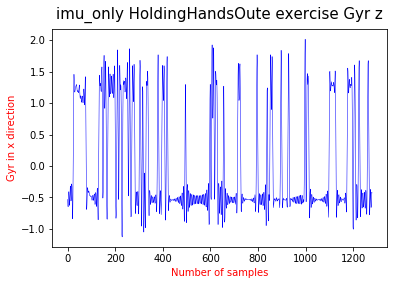

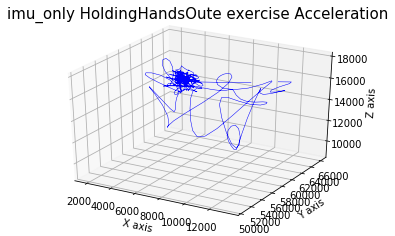

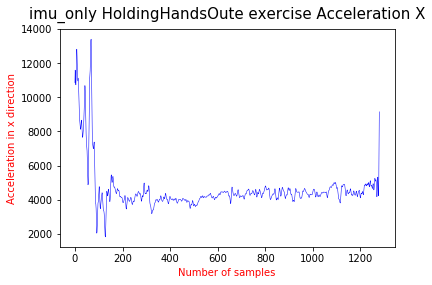

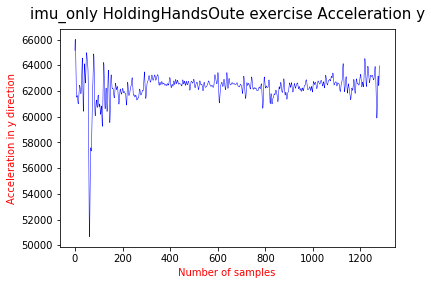

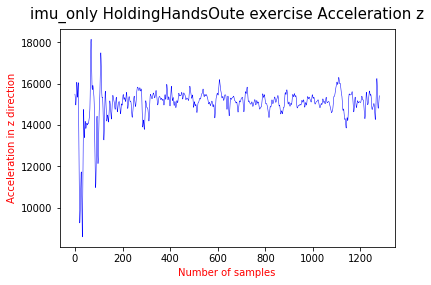

In [451]:
if __name__== "__main__":
    main()